In [ ]:
import requests
import pandas as pd
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from scipy.stats import mannwhitneyu # one-sided
from scipy.stats import ranksums # two-sided
from scipy.stats import spearmanr # the Spearman rank correlation coefficient is a non-parametric measure of correlation, which means it does not make assumptions about the distribution of the data or the linearity of the relationship.
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Download the XLSX file from the website
tz_name = ['metabolite',
           'metadata',
           'pathways',
           'species',
           'cytokines']

nl_name = ['metadata',
           'pathways',
           'species',
           'cytokines']

nl_dict = {name: {} for name in nl_name}
tz_dict = {name: {} for name in tz_name}

print("TZ")
for idx, name in enumerate(tz_name):
    url = f'https://raw.githubusercontent.com/ziyuw2/20.440_project/master/Data/tz_{name}.xlsx'
    response = requests.get(url)
    with open('source.xlsx', 'wb') as f:
        f.write(response.content)
    # Read the Excel file into a Pandas DataFrame
    source_exl = pd.read_excel('source.xlsx', sheet_name=None, engine='openpyxl')
    print(f'Data name: {name}')
    for sheet_name, content in source_exl.items():
        tz_dict[name][sheet_name] = content
        print(f'Sheets in the xlsx: {sheet_name}')

print("NL")
for idx, name in enumerate(nl_name):
    url = f'https://raw.githubusercontent.com/ziyuw2/20.440_project/master/Data/nl_{name}.xlsx'
    response = requests.get(url)
    with open('source.xlsx', 'wb') as f:
        f.write(response.content)
    # Read the Excel file into a Pandas DataFrame
    source_exl = pd.read_excel('source.xlsx', sheet_name=None, engine='openpyxl')
    print(f'Data name: {name}')
    for sheet_name, content in source_exl.items():
        nl_dict[name][sheet_name] = content
        print(f'Sheets in the xlsx: {sheet_name}')

TZ
Data name: metabolite
Sheets in the xlsx: metabolite
Sheets in the xlsx: metadata
Data name: metadata
Sheets in the xlsx: all
Sheets in the xlsx: diet
Data name: pathways
Sheets in the xlsx: pathways
Sheets in the xlsx: metadata
Data name: species
Sheets in the xlsx: species
Sheets in the xlsx: species_lm
Sheets in the xlsx: metadata_lm
Data name: cytokines
Sheets in the xlsx: cytokines
Sheets in the xlsx: metadata
NL
Data name: tracker
Sheets in the xlsx: tracker
Data name: metadata
Sheets in the xlsx: metadata
Data name: pathways
Sheets in the xlsx: pathways
Sheets in the xlsx: metadata
Data name: species
Sheets in the xlsx: species
Sheets in the xlsx: metadata
Data name: cytokines
Sheets in the xlsx: cytokines
Sheets in the xlsx: metadata


In [ ]:
# url = f'https://raw.githubusercontent.com/ziyuw2/20.440_project/master/Data/41467_2021_25213_MOESM19_ESM.xlsx'
# response = requests.get(url)
# with open('source.xlsx', 'wb') as f:
#     f.write(response.content)
# source_exl = pd.read_excel('source.xlsx', sheet_name=None, engine='openpyxl')
# # Loop over each sheet in the Excel file to save each sheet into a dict file
# source_dict = {}
# for sheet_name, content in source_exl.items():
#     # Save the sheet data as a CSV file
#     clean_sheet_name = sheet_name.replace("Fig", "").replace(".", "").replace(" ", "").replace(",", "_")
#     print(clean_sheet_name)
#     content.to_csv(f'{sheet_name}.csv', index=False)
#     df = pd.read_csv(f'{sheet_name}.csv')
#     source_dict[clean_sheet_name] = df

In [ ]:
tz_diet = pd.merge(tz_dict['metadata']['diet'], tz_dict['metadata']['all'][['ID','Residency_Area']], on='ID', how='left')
species_tz = pd.merge(tz_dict['species']['species_lm'], tz_dict['metadata']['all'][['ID','Residency_Area']], on='ID', how='left')
species_tz = pd.merge(species_tz, tz_dict['metadata']['diet'][['ID','exc rice']], on='ID', how='left')

### Fig 4a

In [ ]:
u_fiber = tz_diet.loc[tz_diet['Residency_Area'] == 'Urban', 'exc rice']
r_fiber = tz_diet.loc[tz_diet['Residency_Area'] == 'Rural', 'exc rice']

In [ ]:
# Perform the Wilcoxon rank-sum test
U_statistic, p_value = mannwhitneyu(u_fiber, r_fiber, alternative='less')

print("U statistic:", U_statistic)
print("p-value:", p_value)

U statistic: 7465.0
p-value: 0.022095926949334106


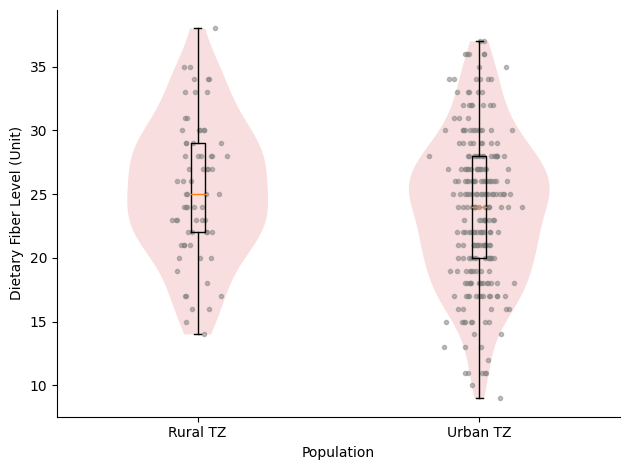

In [ ]:
fig, ax = plt.subplots()
v = ax.violinplot([r_fiber, u_fiber], positions=[1, 2], showextrema=None)
x = np.random.normal(loc=1, scale=0.05, size=len(r_fiber))
ax.plot(x, r_fiber, '.', color='gray', alpha=0.5)
x = np.random.normal(loc=2, scale=0.05, size=len(u_fiber))
ax.plot(x, u_fiber, '.', color='gray', alpha=0.5)

for part in v['bodies']:
    part.set_facecolor('tab:red')
    part.set_alpha(0.15)
ax.boxplot([ r_fiber, u_fiber], positions=[1, 2], widths=0.05, showfliers=False)
plt.xlabel('Population')
plt.xticks([1, 2], ['Rural TZ', 'Urban TZ'])
plt.ylabel('Dietary Fiber Level (Unit)')

# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.set_tight_layout(True)

# show the plot
plt.show()
# fig.savefig('/content/drive/MyDrive/2023 Spring Courses/20.440/20.440 Final Project/ziyu_figures/fiber_dist', format='png', dpi=600)

### Fig. 4 b-d


In [ ]:
species_nl = nl_dict['species']['species']

In [ ]:
am_u = species_tz.loc[species_tz['Residency_Area'] == 'Urban', 'Akkermansia.muciniphila']
am_r = species_tz.loc[species_tz['Residency_Area'] == 'Rural', 'Akkermansia.muciniphila']
am_nl = species_nl['Akkermansia muciniphila']

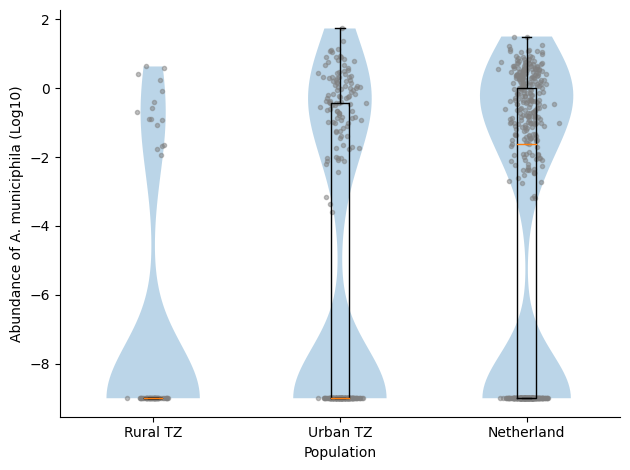

In [ ]:
fig, ax = plt.subplots()
e = 10**-9
plt.violinplot([np.log10(am_r+e), np.log10(am_u+e), np.log10(am_nl+e)], positions=[1, 2, 3], showextrema=None)
x = np.random.normal(loc=1, scale=0.05, size=len(am_r))
ax.plot(x, np.log10(am_r+e), '.', color='gray', alpha=0.5)
x = np.random.normal(loc=2, scale=0.05, size=len(am_u))
ax.plot(x, np.log10(am_u+e), '.', color='gray', alpha=0.5)
x = np.random.normal(loc=3, scale=0.05, size=len(am_nl))
ax.plot(x, np.log10(am_nl+e), '.', color='gray', alpha=0.5)
plt.boxplot([np.log10(am_r+e), np.log10(am_u+e), np.log10(am_nl+e)], positions=[1, 2, 3], widths=0.1, showfliers=False)
plt.xlabel('Population')
plt.xticks([1, 2, 3], ['Rural TZ', 'Urban TZ', 'Netherland'])
plt.ylabel('Abundance of A. municiphila (Log10)')

# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.set_tight_layout(True)

# show the plot
plt.show()
# fig.savefig('/content/drive/MyDrive/2023 Spring Courses/20.440/20.440 Final Project/ziyu_figures/am_dist', format='png', dpi=600)

In [ ]:
U_statistic, p_value = mannwhitneyu(am_r, am_u, alternative='less')
print("U statistic for an one-sided test of the abundance of A. municiphila in Urban vs. Rural Tanzanian population is ", U_statistic)
print("p-value:", p_value)

U_statistic, p_value = mannwhitneyu(am_u, am_nl, alternative='less')
print("U statistic for an one-sided test of the abundance of A. municiphila in Netherland vs. Urban Tanzanian population is ", U_statistic)
print("p-value:", p_value)

U_statistic, p_value = mannwhitneyu(am_r, am_nl, alternative='less')
print("U statistic for an one-sided test of the abundance of A. municiphila in Netherland vs. Rural Tanzanian population is ", U_statistic)
print("p-value:", p_value)

U statistic for an one-sided test of the abundance of A. municiphila in Urban vs. Rural Tanzanian population is  6403.0
p-value: 0.00037248743824172537
U statistic for an one-sided test of the abundance of A. municiphila in Netherland vs. Urban Tanzanian population is  50609.0
p-value: 0.0012678527891968393
U statistic for an one-sided test of the abundance of A. municiphila in Netherland vs. Rural Tanzanian population is  10120.0
p-value: 1.1245291212791244e-07


In [ ]:
# fig, ax = plt.subplots()
# plt.hist(am_r, bins=50, log=True, density=True)
# plt.hist(am_u, bins=50, log=True, alpha = 0.25, density=True)
# plt.hist(am_nl, bins=50, log=True, alpha = 0.25, density=True)
# plt.xlim([-1,20])
# plt.xlabel('Abundance of A. muciniphila')
# plt.ylabel('Density (Log)')

# # remove the top and right spines
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# # show the plot
# plt.show()

In [ ]:
bl_u = species_tz.loc[species_tz['Residency_Area'] == 'Urban', 'Bifidobacterium.longum']
bl_r = species_tz.loc[species_tz['Residency_Area'] == 'Rural', 'Bifidobacterium.longum']
bl_nl = species_nl['Bifidobacterium longum']

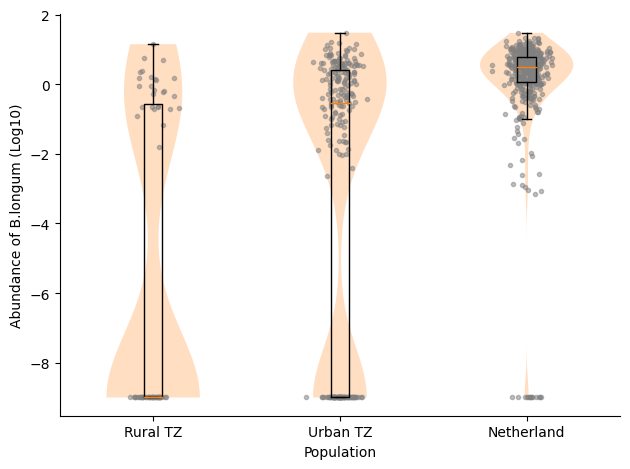

In [ ]:
fig, ax = plt.subplots()
e = 10**-9
violin_parts = plt.violinplot([np.log10(bl_r+e), np.log10(bl_u+e), np.log10(bl_nl+e)], positions=[1, 2, 3], showextrema=None)
x = np.random.normal(loc=1, scale=0.05, size=len(bl_r))
ax.plot(x, np.log10(bl_r+e), '.', color='gray', alpha=0.5)
x = np.random.normal(loc=2, scale=0.05, size=len(bl_u))
ax.plot(x, np.log10(bl_u+e), '.', color='gray', alpha=0.5)
x = np.random.normal(loc=3, scale=0.05, size=len(bl_nl))
ax.plot(x, np.log10(bl_nl+e), '.', color='gray', alpha=0.5)
for part in violin_parts['bodies']:
    part.set_facecolor('tab:orange')
    part.set_alpha(0.25)
plt.boxplot([np.log10(bl_r+e), np.log10(bl_u+e), np.log10(bl_nl+e)], positions=[1, 2, 3], widths=0.1, showfliers=False)
plt.xlabel('Population')
plt.xticks([1, 2, 3], ['Rural TZ', 'Urban TZ', 'Netherland'])
plt.ylabel('Abundance of B.longum (Log10)')

# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.set_tight_layout(True)

# show the plot
plt.show()
# fig.savefig('/content/drive/MyDrive/2023 Spring Courses/20.440/20.440 Final Project/ziyu_figures/bl_dist', format='png', dpi=600)

In [ ]:
U_statistic, p_value = mannwhitneyu(bl_r, bl_u, alternative='less')
print("U statistic for an one-sided test of the abundance of B.longum in Urban vs. Rural Tanzanian population is ", U_statistic)
print("p-value:", p_value)

U_statistic, p_value = mannwhitneyu(bl_u, bl_nl, alternative='less')
print("U statistic for an one-sided test of the abundance of B.longum in Netherland vs. Urban Tanzanian population is ", U_statistic)
print("p-value:", p_value)

U_statistic, p_value = mannwhitneyu(bl_r, bl_nl, alternative='less')
print("U statistic for an one-sided test of the abundance of B.longum in Netherland vs. Rural Tanzanian population is ", U_statistic)
print("p-value:", p_value)

U statistic for an one-sided test of the abundance of B.longum in Urban vs. Rural Tanzanian population is  5682.0
p-value: 1.2746566238148768e-05
U statistic for an one-sided test of the abundance of B.longum in Netherland vs. Urban Tanzanian population is  28691.0
p-value: 2.6081576570314606e-29
U statistic for an one-sided test of the abundance of B.longum in Netherland vs. Rural Tanzanian population is  3429.0
p-value: 4.9005162024226786e-26


In [ ]:
pc_u = species_tz.loc[species_tz['Residency_Area'] == 'Urban', 'Prevotella.copri']
pc_r = species_tz.loc[species_tz['Residency_Area'] == 'Rural', 'Prevotella.copri']
pc_nl = species_nl['Prevotella copri']

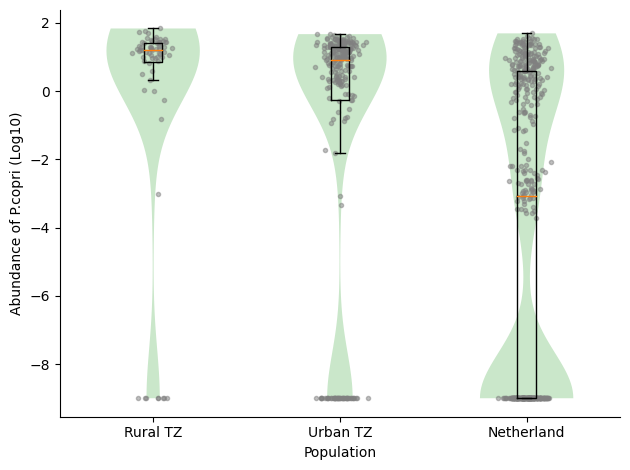

In [ ]:
fig, ax = plt.subplots()
e = 10**-9
violin_parts = plt.violinplot([np.log10(pc_r+e), np.log10(pc_u+e), np.log10(pc_nl+e)], positions=[1, 2, 3], showextrema=None)
x = np.random.normal(loc=1, scale=0.05, size=len(pc_r))
ax.plot(x, np.log10(pc_r+e), '.', color='gray', alpha=0.5)
x = np.random.normal(loc=2, scale=0.05, size=len(pc_u))
ax.plot(x, np.log10(pc_u+e), '.', color='gray', alpha=0.5)
x = np.random.normal(loc=3, scale=0.05, size=len(pc_nl))
ax.plot(x, np.log10(pc_nl+e), '.', color='gray', alpha=0.5)
for part in violin_parts['bodies']:
    part.set_facecolor('tab:green')
    part.set_alpha(0.25)
plt.boxplot([np.log10(pc_r+e), np.log10(pc_u+e), np.log10(pc_nl+e)], positions=[1, 2, 3], widths=0.1, showfliers=False)
plt.xlabel('Population')
plt.xticks([1, 2, 3], ['Rural TZ', 'Urban TZ', 'Netherland'])
plt.ylabel('Abundance of P.copri (Log10)')

# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.set_tight_layout(True)

# show the plot
plt.show()
# fig.savefig('/content/drive/MyDrive/2023 Spring Courses/20.440/20.440 Final Project/ziyu_figures/pc_dist', format='png', dpi=600)

In [ ]:
U_statistic, p_value = mannwhitneyu(pc_r, pc_u, alternative='greater')
print("U statistic for an one-sided test of the abundance of B.longum in Urban vs. Rural Tanzanian population is ", U_statistic)
print("p-value:", p_value)

U_statistic, p_value = mannwhitneyu(pc_u, pc_nl, alternative='greater')
print("U statistic for an one-sided test of the abundance of B.longum in Netherland vs. Urban Tanzanian population is ", U_statistic)
print("p-value:", p_value)

U_statistic, p_value = mannwhitneyu(pc_r, pc_nl, alternative='greater')
print("U statistic for an one-sided test of the abundance of B.longum in Netherland vs. Rural Tanzanian population is ", U_statistic)
print("p-value:", p_value)

U statistic for an one-sided test of the abundance of B.longum in Urban vs. Rural Tanzanian population is  10473.0
p-value: 0.0008782578507568228
U statistic for an one-sided test of the abundance of B.longum in Netherland vs. Urban Tanzanian population is  84633.5
p-value: 3.710009497840378e-25
U statistic for an one-sided test of the abundance of B.longum in Netherland vs. Rural Tanzanian population is  26183.0
p-value: 6.525523172116994e-19


### Fig. 4e

In [ ]:
species_tz = pd.merge(species_tz, tz_dict['metadata']['all'][['ID','BMI']], on='ID', how='left')

In [ ]:
am_tz = species_tz['Akkermansia.muciniphila']
bl_tz = species_tz['Bifidobacterium.longum']
pc_tz = species_tz['Prevotella.copri']
fiber_tz = species_tz['exc rice']
bmi_tz = species_tz['BMI']

The Spearman rank correlation coefficient between dietary fiber and AM abundance in Tanzanian population is  -0.021032293641698337
p-value: 0.7100095134233189
The Spearman rank correlation coefficient between dietary fiber and BL abundance in Tanzanian population is  0.07121498475339828
p-value: 0.20748300211381535
The Spearman rank correlation coefficient between dietary fiber and PC abundance in Tanzanian population is  0.06502372888327078
p-value: 0.24986108627660208
The Spearman rank correlation coefficient between BMI and AM abundance in Tanzanian population is  0.09245812061609973
p-value: 0.10143100453320314
The Spearman rank correlation coefficient between BMI and BL abundance in Tanzanian population is  0.12879378631335642
p-value: 0.02223639302913024
The Spearman rank correlation coefficient between BMI and PC abundance in Tanzanian population is  -0.05642317403990481
p-value: 0.3181696380864838


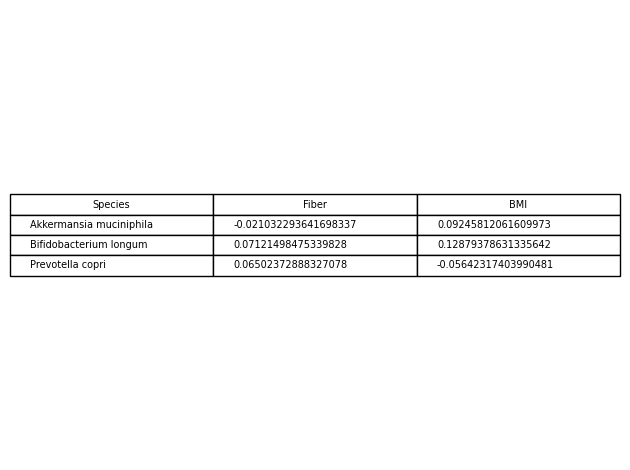

In [ ]:
spear_corr = []
spear_p = []
corr, p_value = spearmanr(fiber_tz, am_tz)
spear_corr.append(corr)
spear_p.append(p_value)
print("The Spearman rank correlation coefficient between dietary fiber and AM abundance in Tanzanian population is ", corr)
print("p-value:", p_value)

corr, p_value = spearmanr(fiber_tz, bl_tz)
spear_corr.append(corr)
spear_p.append(p_value)
print("The Spearman rank correlation coefficient between dietary fiber and BL abundance in Tanzanian population is ", corr)
print("p-value:", p_value)

corr, p_value = spearmanr(fiber_tz, pc_tz)
spear_corr.append(corr)
spear_p.append(p_value)
print("The Spearman rank correlation coefficient between dietary fiber and PC abundance in Tanzanian population is ", corr)
print("p-value:", p_value)

corr, p_value = spearmanr(bmi_tz, am_tz)
spear_corr.append(corr)
spear_p.append(p_value)
print("The Spearman rank correlation coefficient between BMI and AM abundance in Tanzanian population is ", corr)
print("p-value:", p_value)

corr, p_value = spearmanr(bmi_tz, bl_tz)
spear_corr.append(corr)
spear_p.append(p_value)
print("The Spearman rank correlation coefficient between BMI and BL abundance in Tanzanian population is ", corr)
print("p-value:", p_value)

corr, p_value = spearmanr(bmi_tz, pc_tz)
spear_corr.append(corr)
spear_p.append(p_value)
print("The Spearman rank correlation coefficient between BMI and PC abundance in Tanzanian population is ", corr)
print("p-value:", p_value)

spear_path = {'Species': ['Akkermansia muciniphila', 'Bifidobacterium longum', 'Prevotella copri'],
              "Fiber": spear_corr[0:3],
              'BMI': spear_corr[3:]}
spear_path = pd.DataFrame(spear_path)

fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
ax.table(cellText=spear_path.values, colLabels=spear_path.columns, loc='center', cellLoc='left')
plt.tight_layout()
plt.show()
fig.savefig('/content/drive/MyDrive/2023 Spring Courses/20.440/20.440 Final Project/ziyu_figures/spear_fiber_BMI', format='png', dpi=600)

In [ ]:
corr, p_value = spearmanr(am_tz, bl_tz)
print("The Spearman rank correlation coefficient between dietary AM abundance and BL abundance in Tanzanian population is ", corr)
print("p-value:", p_value)
corr, p_value = spearmanr(am_tz, pc_tz)
print("The Spearman rank correlation coefficient between dietary AM abundance and PC abundance in Tanzanian population is ", corr)
print("p-value:", p_value)
corr, p_value = spearmanr(bl_tz, pc_tz)
print("The Spearman rank correlation coefficient between dietary BL abundance and PC abundance in Tanzanian population is ", corr)
print("p-value:", p_value)

The Spearman rank correlation coefficient between dietary AM abundance and BL abundance in Tanzanian population is  0.31076425980870176
p-value: 1.7639482657197582e-08
The Spearman rank correlation coefficient between dietary AM abundance and PC abundance in Tanzanian population is  -0.3166016252101308
p-value: 9.178855982377591e-09
The Spearman rank correlation coefficient between dietary BL abundance and PC abundance in Tanzanian population is  -0.3834336546065516
p-value: 1.7959286237286961e-12


### Not including in the paper

In [ ]:
cyto_tz = tz_dict['cytokines']['cytokines']
cyto_tz = cyto_tz.rename(columns={'row': 'ID'})
# stim_row = tz_dict['cytokines']['metadata'].loc[:, ['Stimulus']]
# stim_row = stim_row.T
# stim_row.insert(0, 'ID', 'NaN')
# stim_row.columns = cyto_tz.columns
# cyto_tz = pd.concat([cyto_tz, stim_row],axis=0).reset_index(drop=True)

In [ ]:
cyto_tz = pd.merge(cyto_tz, tz_dict['species']['species_lm'][['ID','Akkermansia.muciniphila']], on='ID', how='left')
cyto_tz = pd.merge(cyto_tz, tz_dict['species']['species_lm'][['ID','Bifidobacterium.longum']], on='ID', how='left')
cyto_tz = pd.merge(cyto_tz, tz_dict['species']['species_lm'][['ID','Prevotella.copri']], on='ID', how='left')
# cyto_tz.iloc[-1, cyto_tz.columns.get_loc('Akkermansia.muciniphila')] = 0 # set the stim to be 0
cyto_tz = cyto_tz.dropna(subset=['Akkermansia.muciniphila'])  #remove the cytokine data that doesn't have species data

In [ ]:
ifn_tz = cyto_tz[['ID', 'Akkermansia.muciniphila', 'Bifidobacterium.longum', 'Prevotella.copri']]
il6_tz = cyto_tz[['ID', 'Akkermansia.muciniphila', 'Bifidobacterium.longum', 'Prevotella.copri']]
il1b_tz = cyto_tz[['ID', 'Akkermansia.muciniphila', 'Bifidobacterium.longum', 'Prevotella.copri']]
tnfa_tz = cyto_tz[['ID', 'Akkermansia.muciniphila', 'Bifidobacterium.longum', 'Prevotella.copri']]
il10_tz = cyto_tz[['ID', 'Akkermansia.muciniphila', 'Bifidobacterium.longum', 'Prevotella.copri']]

for idx, name in enumerate(cyto_tz.columns):
    if 'IFN' in name:
        ifn_tz = pd.concat([ifn_tz, cyto_tz[name]], axis=1)
    if 'IL6' in name:
        il6_tz = pd.concat([il6_tz, cyto_tz[name]], axis=1)
    if 'IL1b' in name:
        il1b_tz = pd.concat([il1b_tz, cyto_tz[name]], axis=1)
    if 'TNFa' in name:
        tnfa_tz = pd.concat([tnfa_tz, cyto_tz[name]], axis=1)
    if 'IL10' in name:
        il10_tz = pd.concat([il10_tz, cyto_tz[name]], axis=1)

cytotz_dict = {'ifn': ifn_tz, 'il6': il6_tz, 'il1b': il1b_tz, 'tnfa': tnfa_tz, 'il10': il10_tz}

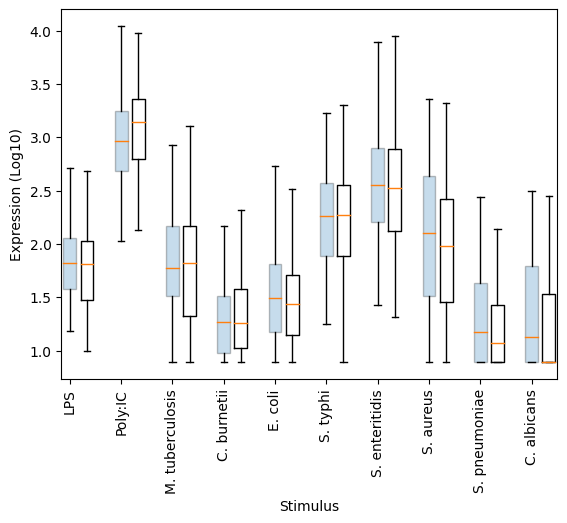

ifn
U statistic for IFNgLPS: 8583.5
p-value: 0.20660877399848132
U statistic for IFNgPolyIC: 6783.5
p-value: 0.06501239345160065
U statistic for IFNgMtb: 8183.0
p-value: 0.5679921598788529
U statistic for IFNgCox: 7580.5
p-value: 0.6386518939133609
U statistic for IFNgEcoli: 8503.5
p-value: 0.26064496025877126
U statistic for IFNgtyphi: 7856.0
p-value: 0.9951752893743094
U statistic for IFNgenteri: 8131.5
p-value: 0.6297879548857606
U statistic for IFNgaureus: 8746.0
p-value: 0.12238844642726066
U statistic for IFNgpneu: 8685.0
p-value: 0.1403448953843616
U statistic for IFNgCand: 9029.5
p-value: 0.03263609379057099


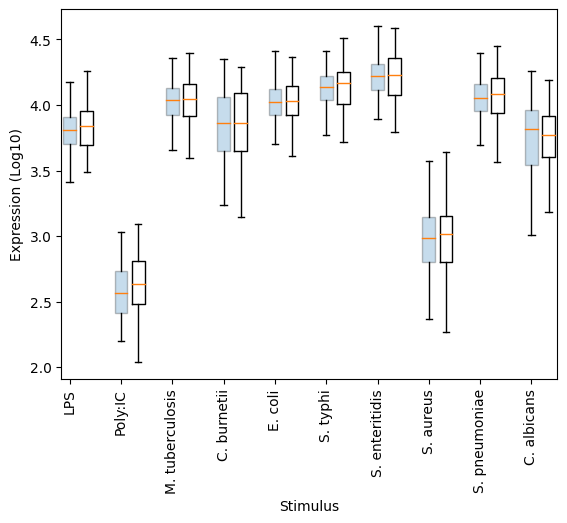

il6
U statistic for IL6LPS: 4860.5
p-value: 0.8667710183740863
U statistic for IL6PolyIC: 4208.0
p-value: 0.07548024502468052
U statistic for IL6Mtb: 4828.5
p-value: 0.8051345188980652
U statistic for IL6Cox: 4818.0
p-value: 0.7851515589425843
U statistic for IL6Ecoli: 4904.5
p-value: 0.952784947687302
U statistic for IL6typhi: 4674.5
p-value: 0.5308971542647423
U statistic for IL6enteri: 4782.0
p-value: 0.7177809442684723
U statistic for IL6aureus: 4766.5
p-value: 0.6894028597531979
U statistic for IL6pneu: 4639.0
p-value: 0.47509206504557544
U statistic for IL6Cand: 5194.5
p-value: 0.5132547484721486


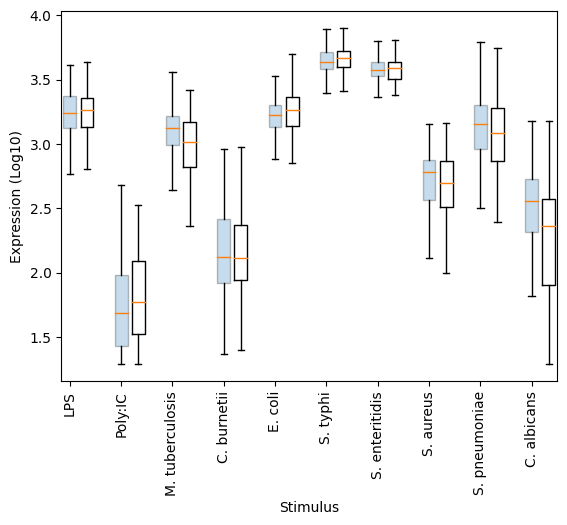

il1b
U statistic for IL1bLPS: 5791.0
p-value: 0.7162441493179175
U statistic for IL1bPolyIC: 5209.5
p-value: 0.1102509380647657
U statistic for IL1bMtb: 7331.5
p-value: 0.0037389166579348348
U statistic for IL1bCox: 6074.0
p-value: 0.8148315827113064
U statistic for IL1bEcoli: 5297.0
p-value: 0.158396434733571
U statistic for IL1btyphi: 5565.5
p-value: 0.40011491488431306
U statistic for IL1benteri: 5994.5
p-value: 0.9476147163059915
U statistic for IL1baureus: 6764.0
p-value: 0.08977020547896598
U statistic for IL1bpneu: 6712.5
p-value: 0.11240879070254653
U statistic for IL1bCand: 7825.5
p-value: 7.862670055019692e-05


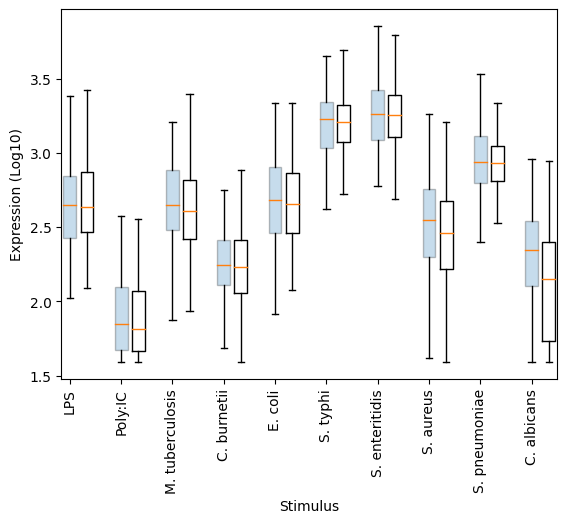

tnfa
U statistic for TNFaLPS: 7382.0
p-value: 0.9035701402292078
U statistic for TNFaPolyIC: 7592.5
p-value: 0.7983818275717163
U statistic for TNFaMtb: 8201.5
p-value: 0.1776793835244843
U statistic for TNFaCox: 7827.5
p-value: 0.4986190961241289
U statistic for TNFaEcoli: 7736.0
p-value: 0.6083499782167777
U statistic for TNFatyphi: 7259.5
p-value: 0.73308709672677
U statistic for TNFaenteri: 7456.5
p-value: 0.9914076557643625
U statistic for TNFaaureus: 8398.5
p-value: 0.08884536382633526
U statistic for TNFapneu: 7881.5
p-value: 0.4391783732598662
U statistic for TNFaCand: 9640.5
p-value: 8.093699164378392e-05


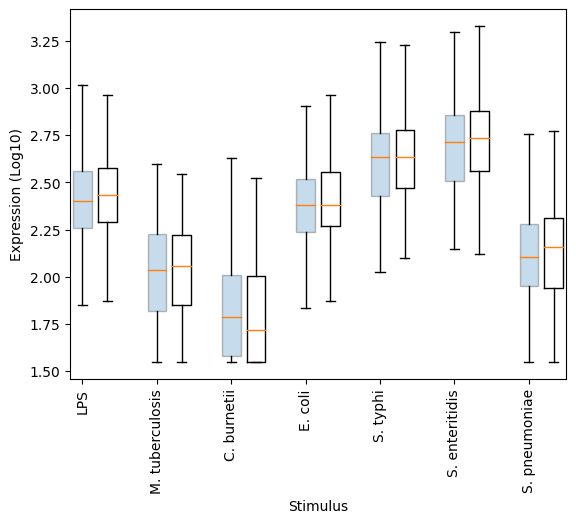

il10
U statistic for IL10LPS: 7830.5
p-value: 0.2079559420784265
U statistic for IL10Mtb: 8691.5
p-value: 0.9007189638554437
U statistic for IL10Cox: 9551.0
p-value: 0.1262418033562528
U statistic for IL10Ecoli: 8004.5
p-value: 0.32747907477006777
U statistic for IL10typhi: 8264.5
p-value: 0.5749280168698685
U statistic for IL10enteri: 8025.0
p-value: 0.34404149759074465
U statistic for IL10pneu: 7931.5
p-value: 0.2726819546109073


In [ ]:
label_pro = ['LPS', 'Poly:IC', 'M. tuberculosis', 'C. burnetii', 'E. coli', 'S. typhi', 'S. enteritidis', 'S. aureus', 'S. pneumoniae', 'C. albicans']
label_anti = ['LPS','M. tuberculosis','C. burnetii','E. coli','S. typhi','S. enteritidis','S. pneumoniae']
for idx, name in enumerate(cytotz_dict):
    currdf = cytotz_dict[name] 
    am = currdf.loc[currdf['Akkermansia.muciniphila'] != 0]
    am = am.dropna()
    noam = currdf.loc[currdf['Akkermansia.muciniphila'] == 0]
    noam = noam.dropna()
    tot_stim = am.shape[1] - 4
    if tot_stim == 10:
        label = label_pro
    else:
        label = label_anti

    fig, ax = plt.subplots()
    ambox = plt.boxplot(np.log10(am.iloc[:, 4:]), positions=np.arange(tot_stim)*3 + 1, widths=0.75, showfliers=False, 
                        patch_artist=True, boxprops = dict(facecolor = "tab:blue", alpha = 0.25, edgecolor='black'))
    plt.boxplot(np.log10(noam.iloc[:, 4:]), positions=np.arange(tot_stim)*3 + 2, widths=0.75, showfliers=False)
    plt.xlabel('Stimulus')
    plt.xticks(np.arange(tot_stim)*3 + 1, label)
    plt.xticks(rotation=90)
    plt.ylabel('Expression (Log10)')
    plt.show()
    fig.set_tight_layout(True)
    # fig.savefig(f'/content/drive/MyDrive/2023 Spring Courses/20.440/20.440 Final Project/ziyu_figures/{name}_am', format='png', dpi=600)
    print(name)
    for i, stim in enumerate(am):
        if name in stim.lower():
            U_statistic, p_value = mannwhitneyu(am[stim],noam[stim], alternative='two-sided')
            print(f"U statistic for {stim}:", U_statistic)
            print("p-value:", p_value)

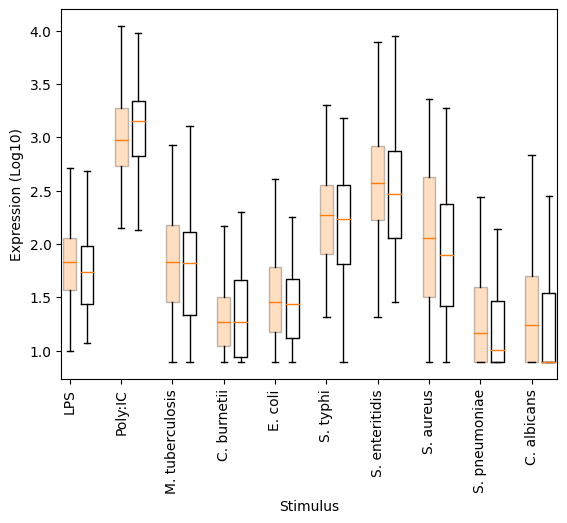

ifn
U statistic for IFNgLPS: 8658.5
p-value: 0.04091832720510699
U statistic for IFNgPolyIC: 6741.5
p-value: 0.9465684618611144
U statistic for IFNgMtb: 8225.0
p-value: 0.16304878451709204
U statistic for IFNgCox: 7788.0
p-value: 0.41356815056721036
U statistic for IFNgEcoli: 8431.0
p-value: 0.08972928115953771
U statistic for IFNgtyphi: 8066.0
p-value: 0.24074173987235836
U statistic for IFNgenteri: 8224.5
p-value: 0.1632683888174848
U statistic for IFNgaureus: 8724.5
p-value: 0.031661927954447604
U statistic for IFNgpneu: 8752.5
p-value: 0.02544198766262048
U statistic for IFNgCand: 8889.5
p-value: 0.012137278545121333


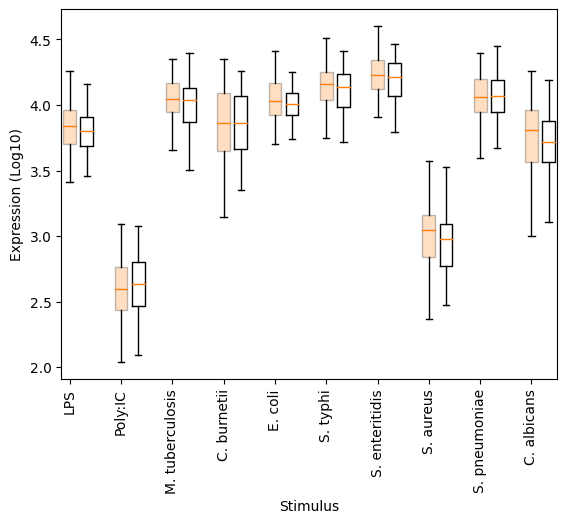

il6
U statistic for IL6LPS: 5371.5
p-value: 0.03352419683918493
U statistic for IL6PolyIC: 4314.5
p-value: 0.8032941838052807
U statistic for IL6Mtb: 5204.5
p-value: 0.0796891310380411
U statistic for IL6Cox: 4701.5
p-value: 0.4484649807505601
U statistic for IL6Ecoli: 5180.5
p-value: 0.08911796935891375
U statistic for IL6typhi: 5117.0
p-value: 0.118025658009352
U statistic for IL6enteri: 5127.5
p-value: 0.11283601180517167
U statistic for IL6aureus: 5387.0
p-value: 0.030692366130739675
U statistic for IL6pneu: 4631.0
p-value: 0.5197516148457032
U statistic for IL6Cand: 5370.0
p-value: 0.03380887760121332


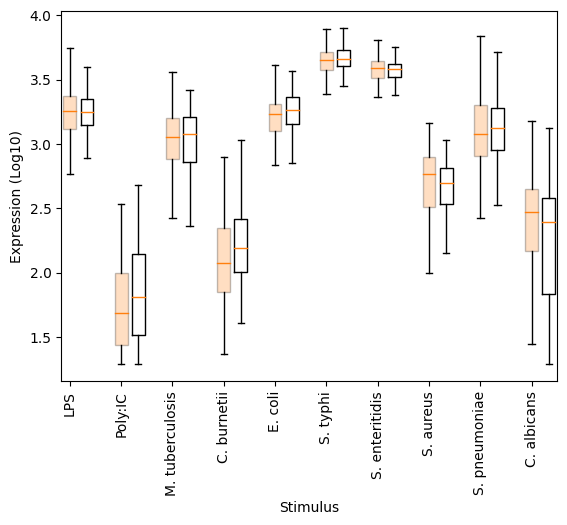

il1b
U statistic for IL1bLPS: 5819.5
p-value: 0.5162317022023567
U statistic for IL1bPolyIC: 4995.0
p-value: 0.9647016021300165
U statistic for IL1bMtb: 5953.5
p-value: 0.4027131393231294
U statistic for IL1bCox: 4885.5
p-value: 0.979391026541217
U statistic for IL1bEcoli: 4929.0
p-value: 0.974301806119096
U statistic for IL1btyphi: 5293.5
p-value: 0.8784741763560774
U statistic for IL1benteri: 5929.5
p-value: 0.4227268633531332
U statistic for IL1baureus: 6506.5
p-value: 0.07623486338368726
U statistic for IL1bpneu: 5811.5
p-value: 0.5230596525984527
U statistic for IL1bCand: 6709.0
p-value: 0.031046169653915826


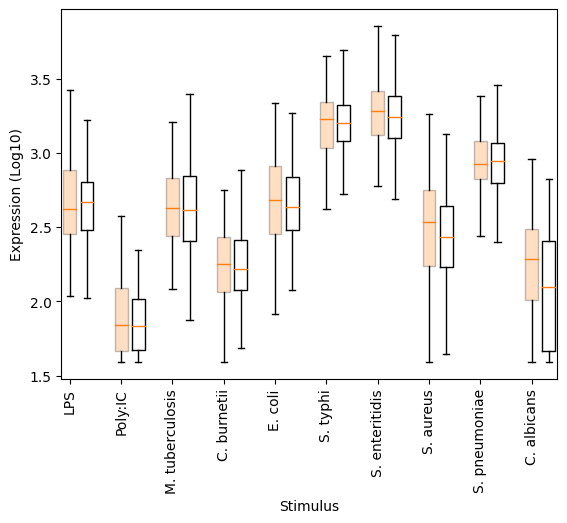

tnfa
U statistic for TNFaLPS: 7361.0
p-value: 0.48810209479052175
U statistic for TNFaPolyIC: 7761.5
p-value: 0.22496557079949353
U statistic for TNFaMtb: 7682.0
p-value: 0.27089151445656423
U statistic for TNFaCox: 7617.5
p-value: 0.3108220115573789
U statistic for TNFaEcoli: 7920.5
p-value: 0.14887539984547432
U statistic for TNFatyphi: 7389.5
p-value: 0.4675821465006764
U statistic for TNFaenteri: 7983.5
p-value: 0.12401285394737155
U statistic for TNFaaureus: 8230.0
p-value: 0.05471386109784778
U statistic for TNFapneu: 7371.5
p-value: 0.48053555752672755
U statistic for TNFaCand: 8743.5
p-value: 0.005605435214704317


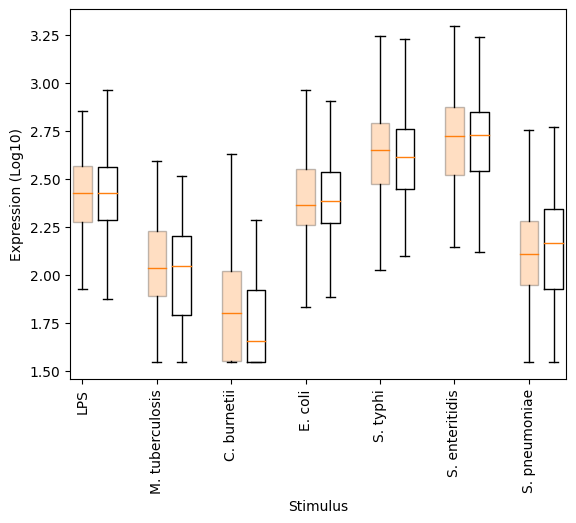

il10
U statistic for IL10LPS: 8561.5
p-value: 0.4977457368824306
U statistic for IL10Mtb: 9082.0
p-value: 0.19870726540428446
U statistic for IL10Cox: 10077.0
p-value: 0.006442078734200694
U statistic for IL10Ecoli: 8432.5
p-value: 0.580282238036254
U statistic for IL10typhi: 8915.5
p-value: 0.281912058280341
U statistic for IL10enteri: 8893.0
p-value: 0.2943078292718149
U statistic for IL10pneu: 7679.0
p-value: 0.9221109179188888


In [ ]:
for idx, name in enumerate(cytotz_dict):
    currdf = cytotz_dict[name] 
    am = currdf.loc[currdf['Bifidobacterium.longum'] != 0]
    am = am.dropna()
    noam = currdf.loc[currdf['Bifidobacterium.longum'] == 0]
    noam = noam.dropna()
    tot_stim = am.shape[1] - 4
    if tot_stim == 10:
        label = label_pro
    else:
        label = label_anti

    fig, ax = plt.subplots()
    ambox = plt.boxplot(np.log10(am.iloc[:, 4:]), positions=np.arange(tot_stim)*3 + 1, widths=0.75, showfliers=False, 
                        patch_artist=True, boxprops = dict(facecolor = "tab:orange", alpha = 0.25, edgecolor='black'))
    plt.boxplot(np.log10(noam.iloc[:, 4:]), positions=np.arange(tot_stim)*3 + 2, widths=0.75, showfliers=False)
    plt.xlabel('Stimulus')
    plt.xticks(np.arange(tot_stim)*3 + 1, label)
    plt.xticks(rotation=90)
    plt.ylabel('Expression (Log10)')
    plt.show()
    fig.set_tight_layout(True)
    # fig.savefig(f'/content/drive/MyDrive/2023 Spring Courses/20.440/20.440 Final Project/ziyu_figures/{name}_bl', format='png', dpi=600)

    print(name)
    for i, stim in enumerate(am):
        if name in stim.lower():
            U_statistic, p_value = mannwhitneyu(am[stim],noam[stim], alternative='greater')
            print(f"U statistic for {stim}:", U_statistic)
            print("p-value:", p_value)

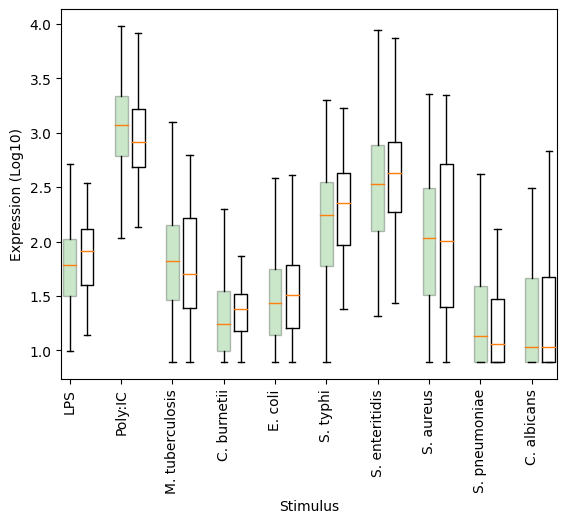

ifn
U statistic for IFNgLPS: 4026.0
p-value: 0.9705304518817185
U statistic for IFNgPolyIC: 5566.0
p-value: 0.06896531844145459
U statistic for IFNgMtb: 5164.5
p-value: 0.2727970941864606
U statistic for IFNgCox: 4319.0
p-value: 0.8944830682208249
U statistic for IFNgEcoli: 4489.5
p-value: 0.8088896910186446
U statistic for IFNgtyphi: 4019.5
p-value: 0.9714715351460194
U statistic for IFNgenteri: 4482.5
p-value: 0.8130064215433775
U statistic for IFNgaureus: 4779.0
p-value: 0.5948160948320246
U statistic for IFNgpneu: 5343.0
p-value: 0.15379677415096432
U statistic for IFNgCand: 4952.0
p-value: 0.44192375270178175


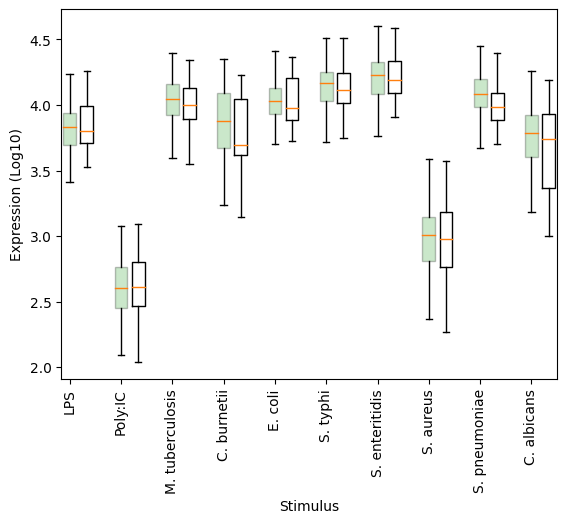

il6
U statistic for IL6LPS: 2975.0
p-value: 0.6043504789477179
U statistic for IL6PolyIC: 2952.0
p-value: 0.6318107044586844
U statistic for IL6Mtb: 3389.0
p-value: 0.15106503894477613
U statistic for IL6Cox: 3682.5
p-value: 0.025527724300049157
U statistic for IL6Ecoli: 3292.5
p-value: 0.23279494843928755
U statistic for IL6typhi: 3276.0
p-value: 0.24888572138401566
U statistic for IL6enteri: 3153.5
p-value: 0.3842360778391265
U statistic for IL6aureus: 3237.0
p-value: 0.2891513926227408
U statistic for IL6pneu: 3814.5
p-value: 0.00902988827348388
U statistic for IL6Cand: 3586.5
p-value: 0.04943228603869539


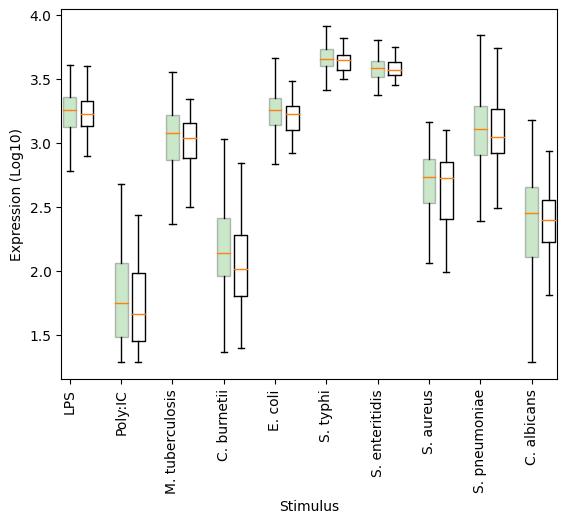

il1b
U statistic for IL1bLPS: 3706.5
p-value: 0.2990072832169087
U statistic for IL1bPolyIC: 3796.0
p-value: 0.21920733508809015
U statistic for IL1bMtb: 3787.5
p-value: 0.22636848701816792
U statistic for IL1bCox: 4357.0
p-value: 0.010090323086332103
U statistic for IL1bEcoli: 4080.0
p-value: 0.0595797485035295
U statistic for IL1btyphi: 4036.5
p-value: 0.07518469004955085
U statistic for IL1benteri: 3706.0
p-value: 0.29948664181358475
U statistic for IL1baureus: 3888.0
p-value: 0.15190594940452518
U statistic for IL1bpneu: 3790.5
p-value: 0.22388379007231696
U statistic for IL1bCand: 3673.0
p-value: 0.33177439036865497


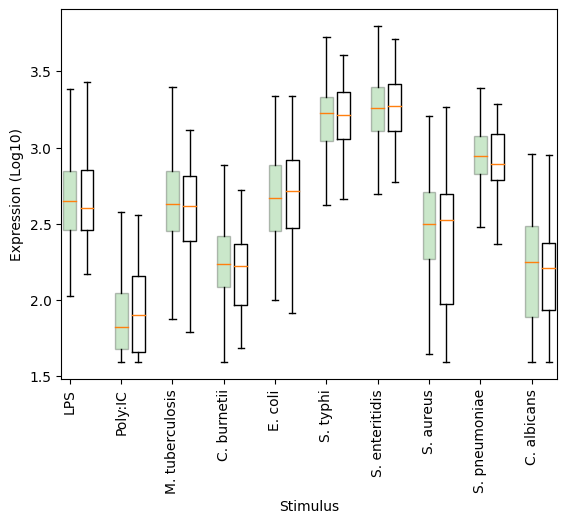

tnfa
U statistic for TNFaLPS: 4751.5
p-value: 0.4964119225375317
U statistic for TNFaPolyIC: 4286.0
p-value: 0.8508359710155134
U statistic for TNFaMtb: 4973.5
p-value: 0.3056683537153567
U statistic for TNFaCox: 5312.0
p-value: 0.1021670560163242
U statistic for TNFaEcoli: 4549.0
p-value: 0.6723211250034361
U statistic for TNFatyphi: 4791.5
p-value: 0.4605949482189833
U statistic for TNFaenteri: 4683.0
p-value: 0.5576562936290924
U statistic for TNFaaureus: 5134.5
p-value: 0.19210149350074024
U statistic for TNFapneu: 5060.5
p-value: 0.24078252966578334
U statistic for TNFaCand: 5182.5
p-value: 0.16334195946125352


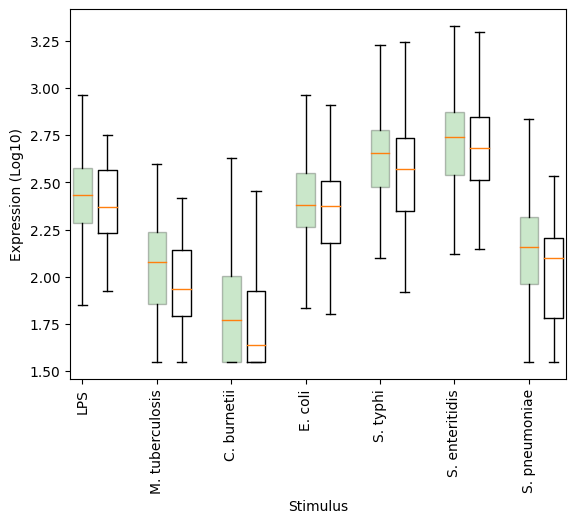

il10
U statistic for IL10LPS: 5991.5
p-value: 0.136875878119116
U statistic for IL10Mtb: 6759.0
p-value: 0.004048680280502865
U statistic for IL10Cox: 6025.5
p-value: 0.1190696770786116
U statistic for IL10Ecoli: 5830.0
p-value: 0.22131983982182213
U statistic for IL10typhi: 6452.5
p-value: 0.021327044221193234
U statistic for IL10enteri: 6119.5
p-value: 0.08796308242463213
U statistic for IL10pneu: 6654.0
p-value: 0.007440964971836131


In [ ]:
for idx, name in enumerate(cytotz_dict):
    currdf = cytotz_dict[name] 
    am = currdf.loc[currdf['Prevotella.copri'] != 0]
    am = am.dropna()
    noam = currdf.loc[currdf['Prevotella.copri'] == 0]
    noam = noam.dropna()
    tot_stim = am.shape[1] - 4
    if tot_stim == 10:
        label = label_pro
    else:
        label = label_anti

    fig, ax = plt.subplots()
    ambox = plt.boxplot(np.log10(am.iloc[:, 4:]), positions=np.arange(tot_stim)*3 + 1, widths=0.75, showfliers=False, 
                        patch_artist=True, boxprops = dict(facecolor = "tab:green", alpha = 0.25, edgecolor='black'))
    plt.boxplot(np.log10(noam.iloc[:, 4:]), positions=np.arange(tot_stim)*3 + 2, widths=0.75, showfliers=False)
    plt.xlabel('Stimulus')
    plt.xticks(np.arange(tot_stim)*3 + 1, label)
    plt.xticks(rotation=90)
    plt.ylabel('Expression (Log10)')
    plt.show()
    fig.set_tight_layout(True)
    # fig.savefig(f'/content/drive/MyDrive/2023 Spring Courses/20.440/20.440 Final Project/ziyu_figures/{name}_pc', format='png', dpi=600)

    print(name)
    for i, stim in enumerate(am):
        if name in stim.lower():
            U_statistic, p_value = mannwhitneyu(am[stim],noam[stim], alternative='greater')
            print(f"U statistic for {stim}:", U_statistic)
            print("p-value:", p_value)

### Fig. 5

In [ ]:
metabolite_tz = tz_dict['metabolite']['metabolite']
species_tsne = species_tz[['ID', 'Akkermansia.muciniphila', 'Bifidobacterium.longum', 'Prevotella.copri','Residency_Area', 'exc rice']]
species_tsne = pd.merge(species_tsne, metabolite_tz, on='ID', how='left')
metabolite_tsne = species_tsne.drop(['ID', 'Akkermansia.muciniphila', 'Bifidobacterium.longum', 'Prevotella.copri','Residency_Area', 'exc rice'], axis=1)

In [ ]:
species_tsne

,ID,Akkermansia.muciniphila,Bifidobacterium.longum,Prevotella.copri,Residency_Area,exc rice,mbx0001,mbx0002,mbx0003,mbx0004,...,mbx1600,mbx1601,mbx1602,mbx1603,mbx1604,mbx1605,mbx1606,mbx1607,tsne1,tsne2
0,TZFG001,3.87696,4.06084,0.00000,Urban,36,7426.0,45670.5,3220.0,1379.0,...,11302.5,8284.5,7386.5,7802.5,10722.5,7575.5,7620.5,11049.5,9.541669,8.259133
1,TZFG002,0.19051,0.34514,21.06489,Urban,11,6506.0,41606.5,2928.0,1450.0,...,14721.0,8097.0,8345.5,7596.5,12069.0,6888.0,6362.5,11075.0,10.492869,8.445490
2,TZFG003,2.60708,1.40806,0.00000,Urban,28,7506.0,46492.5,3278.5,1545.5,...,14723.5,9590.0,10401.5,9059.5,13748.5,7544.5,8658.0,14476.5,7.953526,-11.915409
3,TZFG004,0.00000,7.25136,0.00000,Urban,17,6540.0,44476.0,3310.0,1459.5,...,11106.0,7492.0,7988.5,7312.0,9887.5,6804.5,6704.0,9938.5,10.801407,6.863830
4,TZFG005,0.10282,1.59531,33.03157,Urban,27,7408.0,44251.5,3247.5,1450.5,...,11449.0,8301.5,7893.0,7324.0,10372.0,7753.5,6865.0,10270.0,5.417307,16.540714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,TZFG316,0.00000,0.00000,18.58145,Rural,24,9497.0,50082.0,3809.5,1534.5,...,14254.0,8775.5,7793.5,8314.5,11503.5,7968.5,9010.5,11228.0,-11.453680,-7.276650
311,TZFG317,0.00000,0.00000,9.86473,Rural,23,7639.5,50872.5,3760.0,1522.0,...,11957.5,8253.5,7389.0,8526.0,10437.0,7740.0,8523.5,11398.5,-10.345404,-8.139523
312,TZFG318,0.00000,0.00000,8.80802,Urban,20,8432.5,42520.5,3681.0,1527.5,...,14129.5,8635.0,7766.0,8023.5,12542.5,8086.5,8096.5,11530.5,-15.618142,4.105013
313,TZFG319,0.08453,0.00000,17.60763,Rural,38,8818.0,47810.0,3704.0,1477.0,...,13564.5,8521.5,8233.5,9181.0,10933.0,9394.0,7675.0,10964.5,-4.709995,9.361098


In [ ]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(metabolite_tsne)
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(metabolite_tsne)
species_tsne = pd.concat([species_tsne, pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])], axis=1)

### Fig 5a

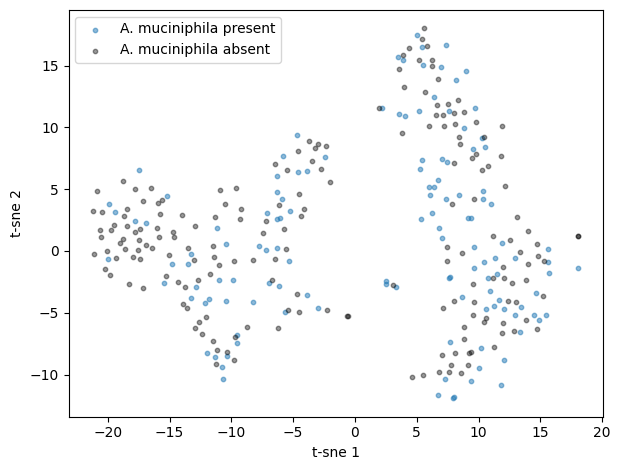

In [ ]:
am_tsne = species_tsne.loc[species_tsne['Akkermansia.muciniphila'] != 0, ['tsne1', 'tsne2']]
noam_tsne = species_tsne.loc[species_tsne['Akkermansia.muciniphila'] == 0, ['tsne1', 'tsne2']]
fig, ax = plt.subplots()
plt.scatter(am_tsne['tsne1'], am_tsne['tsne2'], s=10, alpha = 0.5, label='A. muciniphila present',c='tab:blue')
plt.scatter(noam_tsne['tsne1'], noam_tsne['tsne2'], s=10, alpha=0.4, label='A. muciniphila absent',c="black")
plt.xlabel('t-sne 1')
plt.ylabel('t-sne 2')
plt.legend()
plt.tight_layout()

plt.gca().set_aspect('equal')
# show the plot
plt.show()
fig.savefig('/content/drive/MyDrive/2023 Spring Courses/20.440/20.440 Final Project/ziyu_figures/am_tsne', format='png', dpi=600)

### Sup Fig 1a

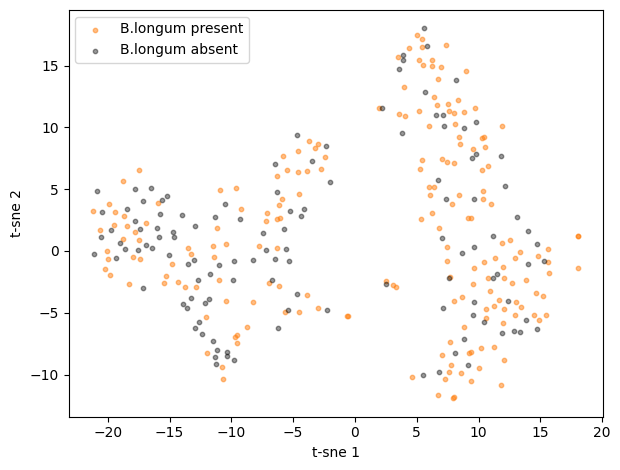

In [ ]:
bl_tsne = species_tsne.loc[species_tsne['Bifidobacterium.longum'] != 0, ['tsne1', 'tsne2']]
nobl_tsne = species_tsne.loc[species_tsne['Bifidobacterium.longum'] == 0, ['tsne1', 'tsne2']]
fig, ax = plt.subplots()
plt.scatter(bl_tsne['tsne1'], bl_tsne['tsne2'], s=10, alpha = 0.5, label='B.longum present',c='tab:orange')
plt.scatter(nobl_tsne['tsne1'], nobl_tsne['tsne2'], s=10, alpha=0.4, label='B.longum absent',c='black')
plt.xlabel('t-sne 1')
plt.ylabel('t-sne 2')
plt.legend()
plt.tight_layout()

plt.gca().set_aspect('equal')
# show the plot
plt.show()
fig.savefig('/content/drive/MyDrive/2023 Spring Courses/20.440/20.440 Final Project/ziyu_figures/bl_tsne', format='png', dpi=600)

### Fig 5b

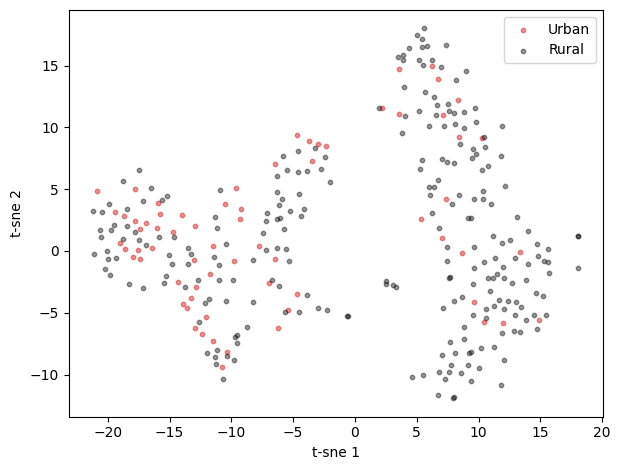

In [ ]:
r_tsne = species_tsne.loc[species_tsne['Residency_Area'] == 'Rural', ['tsne1', 'tsne2']]
u_tsne = species_tsne.loc[species_tsne['Residency_Area'] == 'Urban', ['tsne1', 'tsne2']]
fig, ax = plt.subplots()
plt.scatter(r_tsne['tsne1'], r_tsne['tsne2'], s=10, alpha = 0.5, label='Urban',c='tab:red')
plt.scatter(u_tsne['tsne1'], u_tsne['tsne2'], s=10, alpha=0.4, label='Rural',c='black')
plt.xlabel('t-sne 1')
plt.ylabel('t-sne 2')
plt.legend()
plt.tight_layout()

plt.gca().set_aspect('equal')
# show the plot
plt.show()
fig.savefig('/content/drive/MyDrive/2023 Spring Courses/20.440/20.440 Final Project/ziyu_figures/tz_tsne', format='png', dpi=600)

### Sup Fig. 1b-d

In [ ]:
mmeta = tz_dict['metabolite']['metadata']
id_meta = ['ID','mbx0131', 'mbx0993','mbx0427','mbx0029','mbx0177','mbx0045','mbx0082','mbx0239','mbx0190','mbx0041']
print(mmeta.loc[mmeta['ID'].isin(id_meta), 'name'])
select_meta = metabolite_tz[id_meta]

28                                  Histamine
40                               Fumaric acid
44                              Acetylglycine
81                            L-Aspartic acid
130                               L-Histidine
176                         1-Methylhistidine
189                        N2-Acetylornithine
238                           Homo-L-arginine
426    D-Erythro-imidazole-glycerol-phosphate
992              Phosphoribosyl pyrophosphate
Name: name, dtype: object


In [ ]:
species_select= species_tz[['ID', 'Akkermansia.muciniphila', 'Bifidobacterium.longum', 'Prevotella.copri','Residency_Area', 'exc rice']]
species_select = pd.merge(species_select, select_meta, on='ID', how='left')
meta_select = species_select.drop(['ID', 'Akkermansia.muciniphila', 'Bifidobacterium.longum', 'Prevotella.copri','Residency_Area', 'exc rice'], axis=1)

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(meta_select)
species_select = pd.concat([species_select, pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])], axis=1)

In [ ]:
meta_select

,mbx0131,mbx0993,mbx0427,mbx0029,mbx0177,mbx0045,mbx0082,mbx0239,mbx0190,mbx0041
0,1248649.5,6976.0,4069.0,33894.5,145398.0,9117.5,15098.0,15864.5,47495.0,6978.5
1,1138735.5,6545.5,4666.5,29562.5,33022.0,8674.5,14489.0,15276.5,31085.5,6628.0
2,1167998.0,6413.5,3838.5,29940.0,102245.0,9244.0,14233.0,16353.5,39012.0,7075.0
3,1154559.5,6459.5,3836.5,31781.0,34277.0,8886.0,13846.0,17749.5,27170.5,6083.5
4,1075035.5,7603.5,3905.0,29573.5,32127.5,9771.5,15638.5,17563.0,34307.5,6895.0
...,...,...,...,...,...,...,...,...,...,...
310,940937.5,8431.0,6391.0,26270.0,28000.5,10764.5,16965.5,13138.0,33864.5,10742.5
311,928552.5,8079.5,11981.0,25834.5,30174.0,11149.5,17178.0,14294.0,35142.0,11398.0
312,852858.0,8483.0,6117.5,23847.0,31365.0,10193.0,17794.5,12932.5,36010.0,9966.5
313,1122696.0,8625.0,5029.5,30145.0,32072.0,10021.0,16769.5,14574.5,50518.0,7386.5


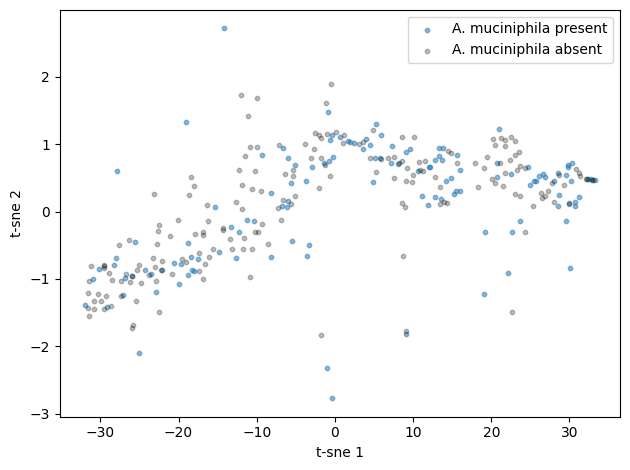

In [ ]:
am_tsne = species_select.loc[species_select['Akkermansia.muciniphila'] != 0, ['tsne1', 'tsne2']]
noam_tsne = species_select.loc[species_select['Akkermansia.muciniphila'] == 0, ['tsne1', 'tsne2']]
fig, ax = plt.subplots()
plt.scatter(am_tsne['tsne1'], am_tsne['tsne2'], s=10, alpha = 0.5, label='A. muciniphila present',c='tab:blue')
plt.scatter(noam_tsne['tsne1'], noam_tsne['tsne2'], s=10, alpha=0.25, label='A. muciniphila absent',c='black')
plt.xlabel('t-sne 1')
plt.ylabel('t-sne 2')
plt.legend()
plt.tight_layout()

# plt.gca().set_aspect('equal')
# show the plot
plt.show()
fig.savefig('/content/drive/MyDrive/2023 Spring Courses/20.440/20.440 Final Project/ziyu_figures/select_am_tsne', format='png', dpi=600)

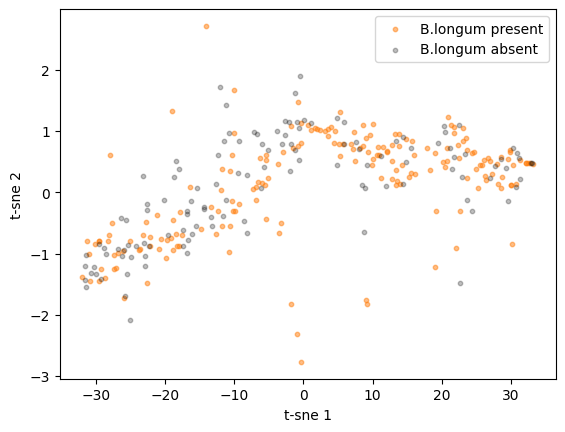

In [ ]:
bl_tsne = species_select.loc[species_select['Bifidobacterium.longum'] != 0, ['tsne1', 'tsne2']]
nobl_tsne = species_select.loc[species_select['Bifidobacterium.longum'] == 0, ['tsne1', 'tsne2']]
fig, ax = plt.subplots()
plt.scatter(bl_tsne['tsne1'], bl_tsne['tsne2'], s=10, alpha = 0.5, label='B.longum present', c='tab:orange')
plt.scatter(nobl_tsne['tsne1'], nobl_tsne['tsne2'], s=10, alpha=0.25, label='B.longum absent', c='black')
plt.xlabel('t-sne 1')
plt.ylabel('t-sne 2')
plt.legend()

# plt.gca().set_aspect('equal')
# show the plot
plt.show()
# fig.savefig('/content/drive/MyDrive/2023 Spring Courses/20.440/20.440 Final Project/ziyu_figures/select_bl_tsne', format='png', dpi=600)

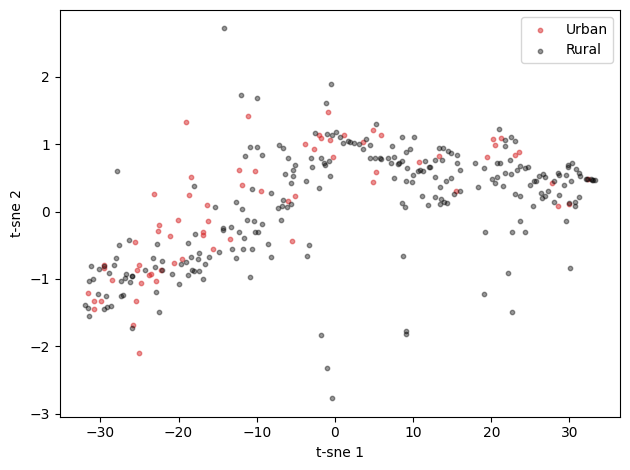

In [ ]:
r_tsne = species_select.loc[species_select['Residency_Area'] == 'Rural', ['tsne1', 'tsne2']]
u_tsne = species_select.loc[species_select['Residency_Area'] == 'Urban', ['tsne1', 'tsne2']]
fig, ax = plt.subplots()
plt.scatter(r_tsne['tsne1'], r_tsne['tsne2'], s=10, alpha = 0.5, label='Urban',c='tab:red')
plt.scatter(u_tsne['tsne1'], u_tsne['tsne2'], s=10, alpha=0.4, label='Rural',c='black')
plt.xlabel('t-sne 1')
plt.ylabel('t-sne 2')
plt.legend()
plt.tight_layout()

# plt.gca().set_aspect('equal')
# show the plot
plt.show()
fig.savefig('/content/drive/MyDrive/2023 Spring Courses/20.440/20.440 Final Project/ziyu_figures/select_tz_tsne', format='png', dpi=600)